# SimuPark: Un parque simulado

392.47197860023283


Text(0, 0.5, 'Frecuencia')

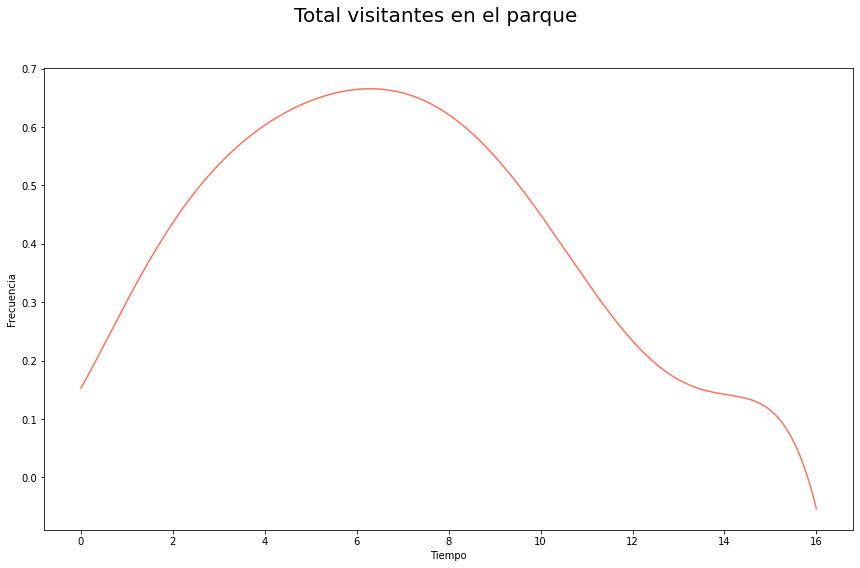

In [2]:
from matplotlib.pyplot import plot, hist, gcf, figure, xlabel, ylabel
import numpy as np
from scipy.special import gamma, factorial
import pandas as pd
import scipy.stats as st

fig = gcf()
fig.set_size_inches(14.5, 8.5)

x = np.linspace(0, 16, 16*60)
k = 5
fn = lambda x, k:  (((0.631012633902875 * ((x+1) ** 0 ) + 0.141641794969108 * ((x+1) ** 1 ) + 1.08320562754808 * ((x+1) ** 2 ) + -0.386896805430061 * ((x+1) ** 3 ) + 0.0645561077512354 * ((x+1) ** 4 ) + -0.00580069833046977 * ((x+1) ** 5 ) + 0.000263776181717327 * ((x+1) ** 6 ) + -4.72376212119374e-06 * ((x+1) ** 7 ))) / 10)

print(sum(fn(x, k)))

plot(x, fn(x,k), color='#ff725e')
fig.suptitle('Total visitantes en el parque', fontsize = 20)
xlabel('Tiempo')
ylabel('Frecuencia')

In [3]:
from simuPark.park import Activity, Attraction, Park
from simuPark.person import Person, Archetype
import random

park = Park(
    fn=fn
)

park.start_day(max_entry_rate=95000/960, wait_time_update=5)

Generating Entry Events...
Entry Events Generated



100%|██████████| 960/960 [00:16<00:00, 56.69it/s] 


39235
['Walk15', 'Walk10', 'ShopGifts', 'EatRestaurant', 'BathroomBreak', 'TakePictures']
['DINOSAUR', 'Expedition Everest', 'Flight of Passage', 'Kali River Rapids', 'Kilimanjaro Safaris', "Na'vi River Journey", 'TriceraTop Spin']
['Tourist', 'Average', 'Activity Enjoyer', 'Attraction Enjoyer', 'All Day Park', 'Relaxed Visitor']


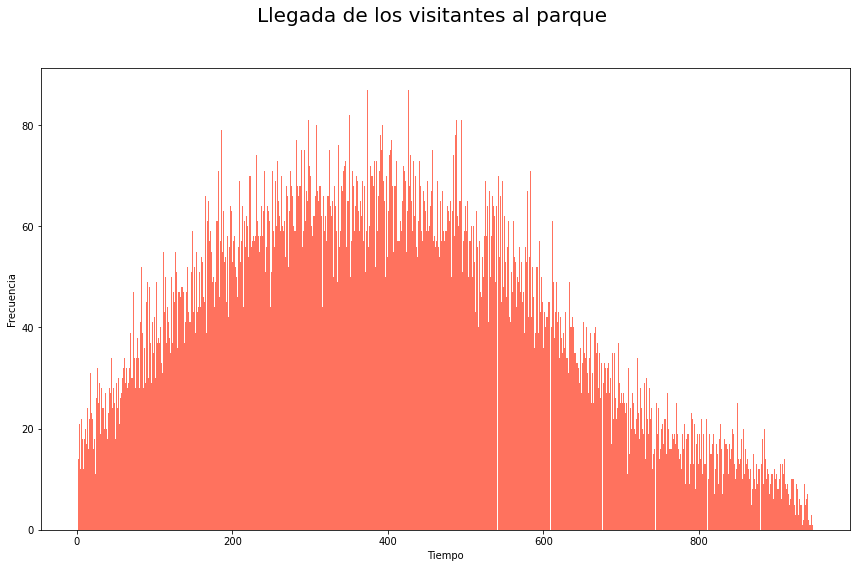

In [4]:
print(len(park.guests))

y = [guest.arrival_time for guest in park.guests]

fig = figure()
fig.set_size_inches(14.5, 8.5)
hist(y, color="#ff725e", bins=960);
fig.suptitle('Llegada de los visitantes al parque', fontsize = 20)
xlabel('Tiempo')
ylabel('Frecuencia')


print([i.name for i in park.activities])
print([i.name for i in park.attractions])
print([i.name for i in park.guest_archetypes])

In [5]:
guest_data = []
column_name = [
    'Archetype',
    'arrival_time',
    'departure_time',
    'time_in_park',
    'max_wait',
    'attractions_experienced',
    'total_wait_time',
    'average_wait_time',
    ]

for guest in park.guests:
    current_guest = []

    current_guest.append(guest.archetype)
    current_guest.append(guest.arrival_time)
    current_guest.append(guest.departure_time)
    current_guest.append(guest.departure_time - guest.arrival_time)
    current_guest.append(guest.max_wait)
    current_guest.append(guest.attractions_experienced)
    current_guest.append(guest.total_wait_time)
    if guest.attractions_experienced == 0:
        current_guest.append(0)
    else: 
        current_guest.append(guest.total_wait_time / guest.attractions_experienced)

    guest_data.append(current_guest)

guest_df = pd.DataFrame(guest_data, columns=column_name)
guest_df

,Archetype,arrival_time,departure_time,time_in_park,max_wait,attractions_experienced,total_wait_time,average_wait_time
0,All Day Park,1,510,509,40,10,155,15.50
1,Relaxed Visitor,1,299,298,25,4,31,7.75
2,Tourist,1,311,310,60,11,88,8.00
3,Attraction Enjoyer,1,511,510,70,15,219,14.60
4,Activity Enjoyer,1,85,84,10,0,0,0.00
...,...,...,...,...,...,...,...,...
39230,Activity Enjoyer,944,960,16,10,0,0,0.00
39231,Relaxed Visitor,945,960,15,25,0,0,0.00
39232,Activity Enjoyer,945,960,15,10,0,0,0.00
39233,Relaxed Visitor,945,960,15,25,0,0,0.00


Atracciones experimentadas promedio: 3.5528482222505415
Atracciones experimentadas desviación estandar: 2.9327762845710743


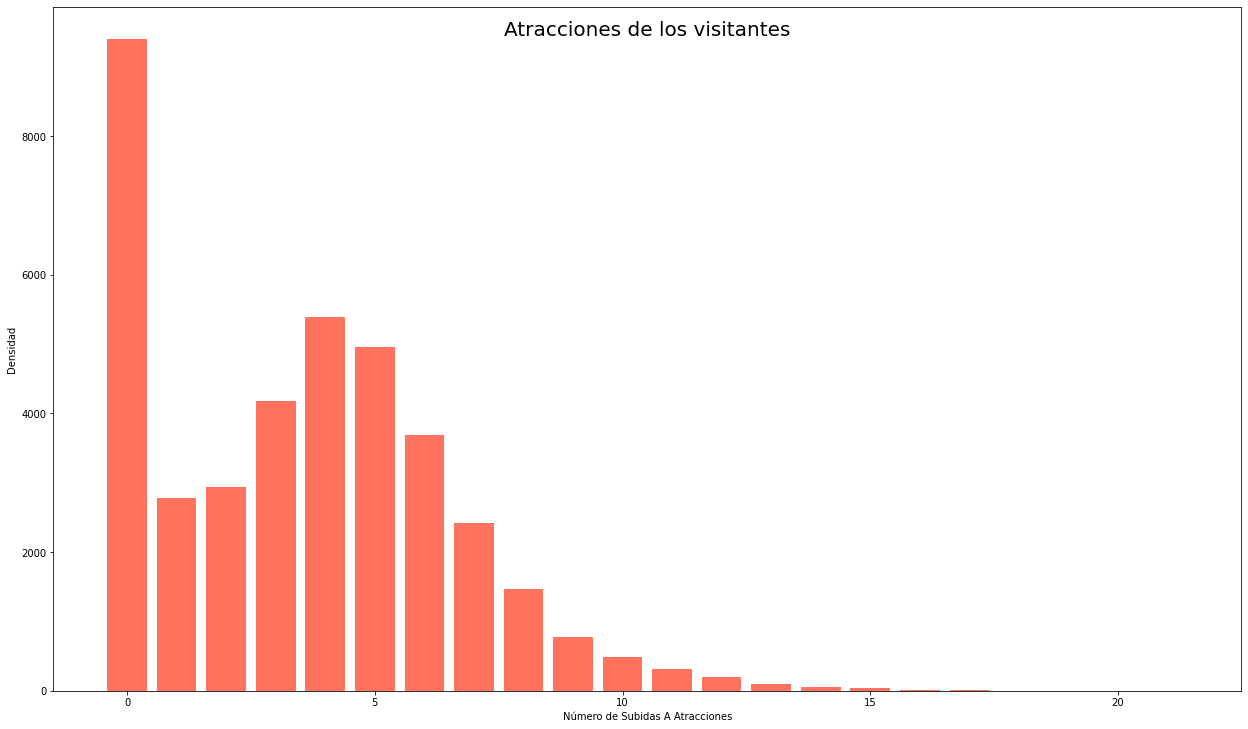

In [15]:
heights = [0 for _ in range(np.max(guest_df['attractions_experienced'])+1)]
labels = [i for i in range(np.max(guest_df['attractions_experienced'])+1)]
attrExp = [guest.attractions_experienced for guest in park.guests]

for guest in park.guests:
    heights[guest.attractions_experienced] += 1

fig = figure()
fig.set_size_inches(16.5, 9.5)
ax = fig.add_axes([0,0,1,1])
ax.bar(labels, heights, color="#ff725e");
fig.suptitle('Atracciones de los visitantes', fontsize = 20)
xlabel('Número de Subidas A Atracciones')
ylabel('Densidad')

print(f'Atracciones experimentadas promedio: {np.mean(attrExp)}')
print(f'Atracciones experimentadas desviación estandar: {np.std(attrExp)}')

36.86573792186591
(36.68445907044547, 37.047016773286344)
29839
122.0


Text(0, 0.5, 'Densidad')

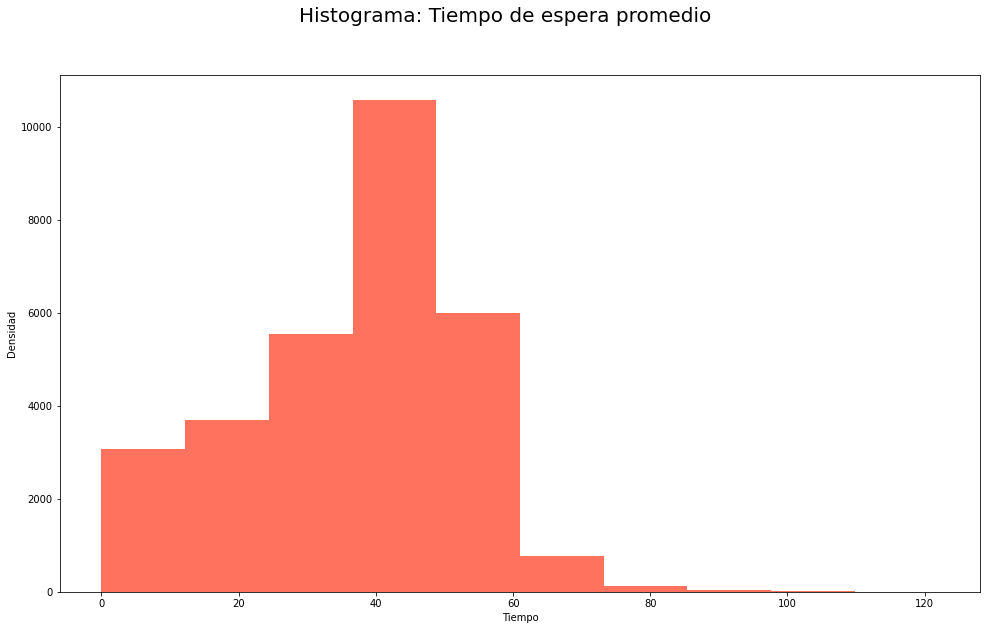

In [16]:
import scipy.stats as st

avgWaitTime = []

for guest in park.guests:
    if guest.attractions_experienced != 0:
        avgWaitTime.append(guest.total_wait_time / guest.attractions_experienced)

print(np.mean(avgWaitTime))
print(st.t.interval(alpha=0.95, df=len(avgWaitTime)-1, loc=np.mean(avgWaitTime), scale=st.sem(avgWaitTime)))
print(len(avgWaitTime))
print(max(avgWaitTime))

fig = figure()
fig.set_size_inches(16.5, 9.5)
hist(avgWaitTime, color="#ff725e");
fig.suptitle('Histograma: Tiempo de espera promedio', fontsize = 20)
xlabel('Tiempo')
ylabel('Densidad')


In [8]:
attr_wait_time = [[attr.name, attr.queue.top_wait_time] for attr in park.attractions]
attr_df = pd.DataFrame(attr_wait_time, columns=["Name", "MaximunWaitTime"])
attr_df

,Name,MaximunWaitTime
0,DINOSAUR,30
1,Expedition Everest,15
2,Flight of Passage,50
3,Kali River Rapids,5
4,Kilimanjaro Safaris,30
5,Na'vi River Journey,35
6,TriceraTop Spin,0


In [9]:
[guest for guest in park.guests if guest.attractions_experienced != 0 and guest.attractions_experienced == max(labels)][0].report()


id: 549  arvTime: 29 things_done: ["Na'vi River Journey", 'Flight of Passage', 'DINOSAUR', "Na'vi River Journey", "Na'vi River Journey", 'DINOSAUR', 'DINOSAUR', 'Kilimanjaro Safaris', 'Expedition Everest', 'TriceraTop Spin', 'DINOSAUR', 'Expedition Everest', 'Kilimanjaro Safaris', 'Kali River Rapids', "Na'vi River Journey", 'Expedition Everest', 'Expedition Everest', 'DINOSAUR', 'Flight of Passage', 'Flight of Passage', 'Expedition Everest'] attrExp: 21
queues_joined: 21 total_wait_time: 234 archetype: Attraction Enjoyer


In [10]:
[guest for guest in park.guests if guest.attractions_experienced != 0 and guest.total_wait_time / guest.attractions_experienced == max(avgWaitTime)][0].report()


id: 37177  arvTime: 779 things_done: ['Flight of Passage'] attrExp: 1
queues_joined: 2 total_wait_time: 122 archetype: Tourist


In [11]:
len(park.attractions[0].queue.in_queue)

754

In [12]:
len([guest for guest in park.guests if guest.attractions_experienced == 0])

9396